In [1]:
# Bibliotecas

%run funcoes.py
%matplotlib inline

In [2]:
# Leitura dos arquivos e divisao dos dados

# --- DADOS --- #
fs = 1000
qtd_periodo = 10
conv_adc = 3.3/255

# --- ARQUIVO --- #
arq = lista_arquivos('./dados', ".txt")
sinal_base = abrir_arquivos(arq, len(arq))

print(arq)
op_arquivo = 0

# --- CH1 --- #
canal_1 = sinal_base[op_arquivo][:,0]
Nch1 = canal_1.size - 1
ch1 = canal_1[1:Nch1+1] - np.mean(canal_1[1:Nch1+1])

# --- CH2 --- #
canal_2 = sinal_base[op_arquivo][:,2]
Nch2 = canal_2.size - 1
ch2 = canal_2[1:Nch2+1] - np.mean(canal_2[1:Nch2+1])

# --- TEMPO --- #
temp_ch1 = np.arange(0.0, Nch1/fs , 1.0/fs)
temp_ch2 = np.arange(0.0, Nch2/fs , 1.0/fs)

['./dados/1_soco_1.txt', './dados/2_tesoura_1.txt']


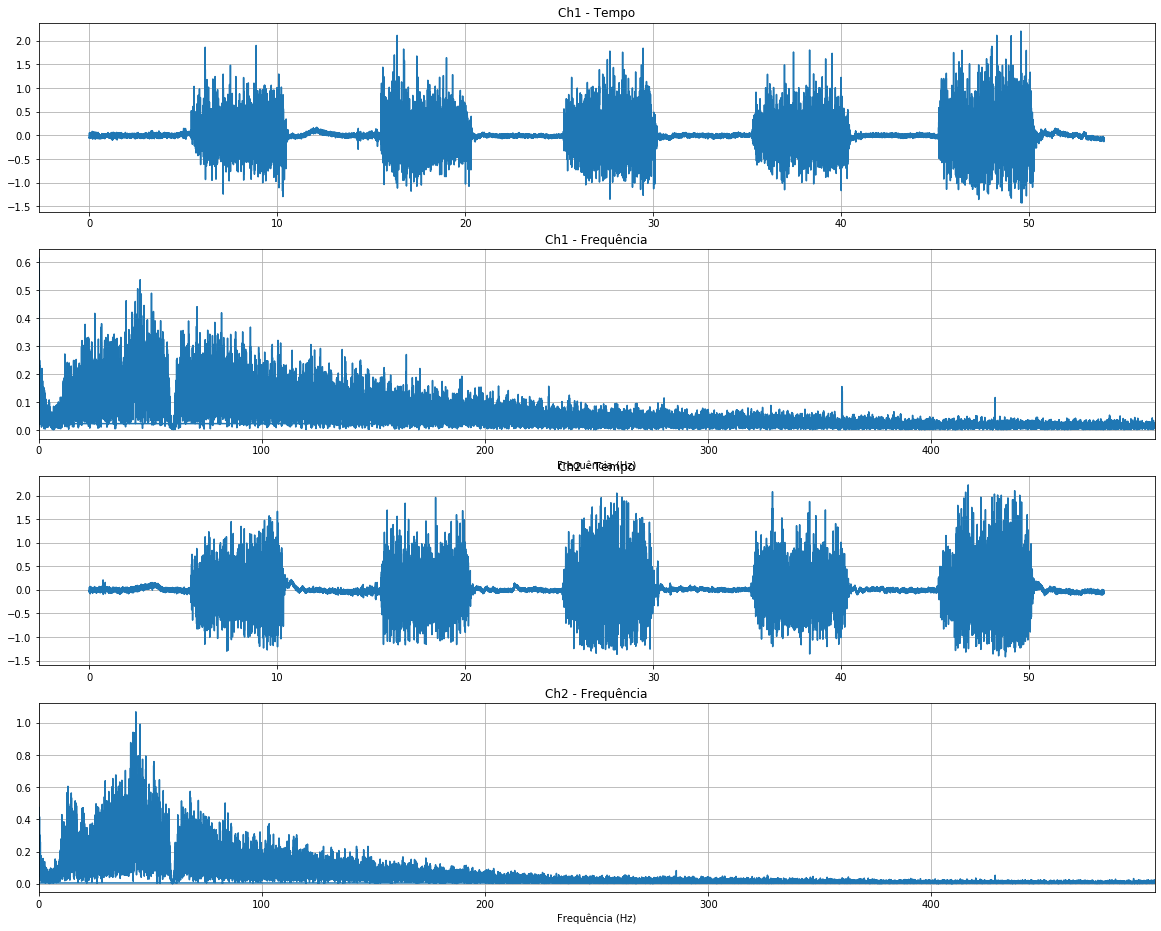

In [3]:
# Filtros e FFT

#%matplotlib qt

# --- 60Hz --- #
(b, a) = signal.iirnotch(60.0, 20, fs)
ch1 = signal.filtfilt(b, a, ch1)
ch2 = signal.filtfilt(b, a, ch2)

# --- FFT --- #
fftx_ch1, ffty_ch1 = fft_sinal(ch1, fs)
fftx_ch2, ffty_ch2 = fft_sinal(ch2, fs)

# --- PLOT --- #
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 16))

ax1.set_title("Ch1 - Tempo")
ax1.plot(temp_ch1, ch1*conv_adc)
ax1.grid()

ax2.set_title("Ch1 - Frequência")
ax2.plot(fftx_ch1, 1.0/Nch1 * np.abs(ffty_ch1))
ax2.set_xlabel('Frequência (Hz)')
ax2.set_xlim(0, max(fftx_ch1))
ax2.grid()

ax3.set_title("Ch2 - Tempo")
ax3.plot(temp_ch2, ch2*conv_adc)
ax3.grid()

ax4.set_title("Ch2 - Frequência")
ax4.plot(fftx_ch2, 1.0/Nch2 * np.abs(ffty_ch2))
ax4.set_xlabel('Frequência (Hz)')
ax4.set_xlim(0, max(fftx_ch2))
ax4.grid()

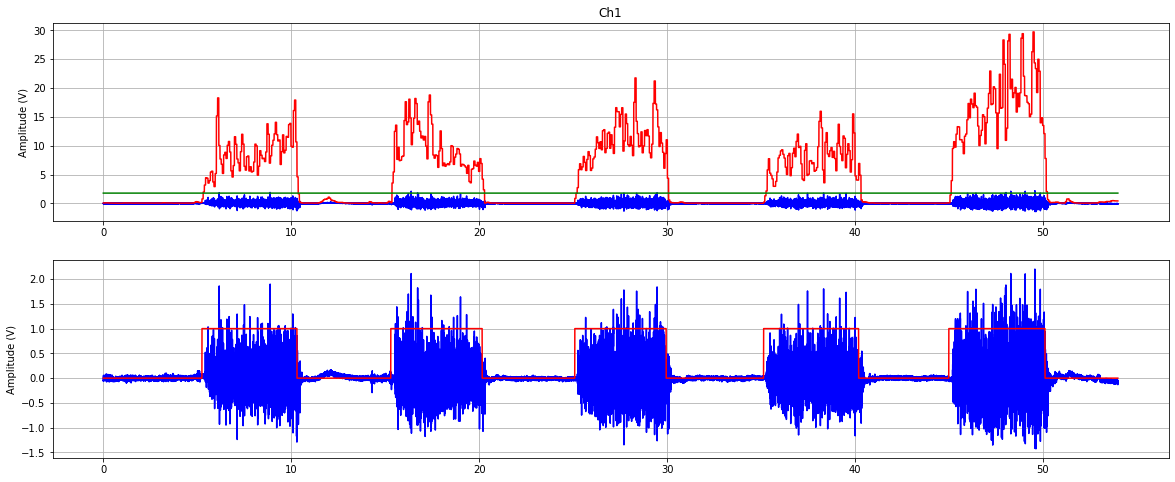

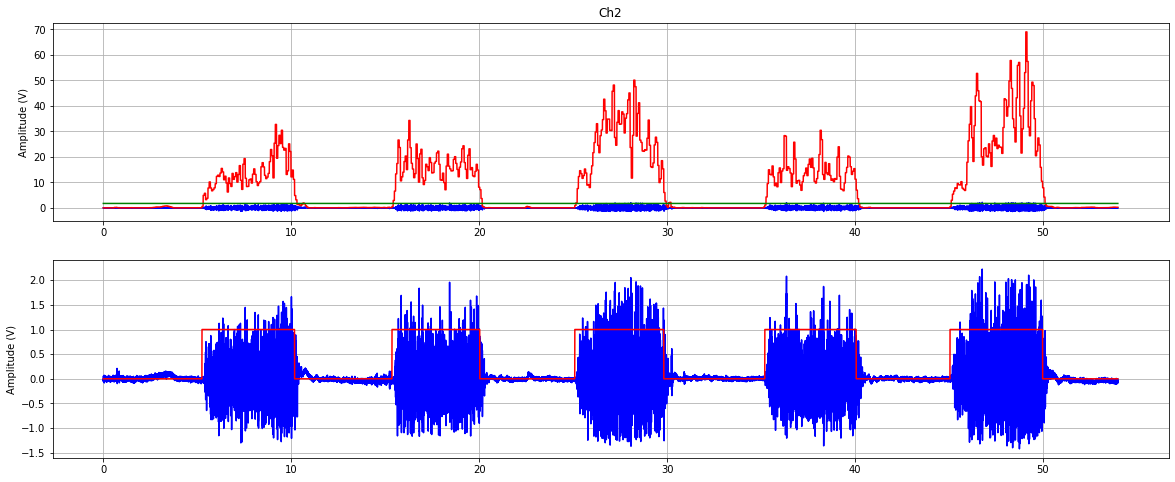

In [4]:
#%matplotlib inline
#%matplotlib qt

# --- ENERGIA --- #
energia_ch1 = energia_sinal(ch1, block_size=64)
energia_ch2 = energia_sinal(ch2, block_size=64)

atv_1, atvi_1, tr = detect_ativ(energia_ch1, th=0.2, block_size=64)
atv_2, atvi_2, tr = detect_ativ(energia_ch2, th=0.2, block_size=64)

ref = np.full(len(energia_ch1), tr*conv_adc)

# --- PLOT --- #
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))
ax1.set_title("Ch1")
ax1.plot(temp_ch1, ch1*conv_adc, color='b')
ax1.plot(temp_ch1, energia_ch1*conv_adc, color='r')
ax1.plot(temp_ch1, ref, color='g')
ax1.set_ylabel('Amplitude (V)')
ax1.grid()

ax2.plot(temp_ch1, ch1*conv_adc, color='b')
ax2.plot(temp_ch1, atv_1, color='#ff0000')
ax2.set_ylabel('Amplitude (V)')
ax2.grid()

fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(20, 8))
ax3.set_title("Ch2")
ax3.plot(temp_ch2, ch2*conv_adc, color='b')
ax3.plot(temp_ch2, energia_ch2*conv_adc, color='r')
ax3.plot(temp_ch2, ref, color='g')
ax3.set_ylabel('Amplitude (V)')
ax3.grid()

ax4.plot(temp_ch2, ch2*conv_adc, color='b')
ax4.plot(temp_ch2, atv_2, color='#ff0000')
ax4.set_ylabel('Amplitude (V)')
ax4.grid()

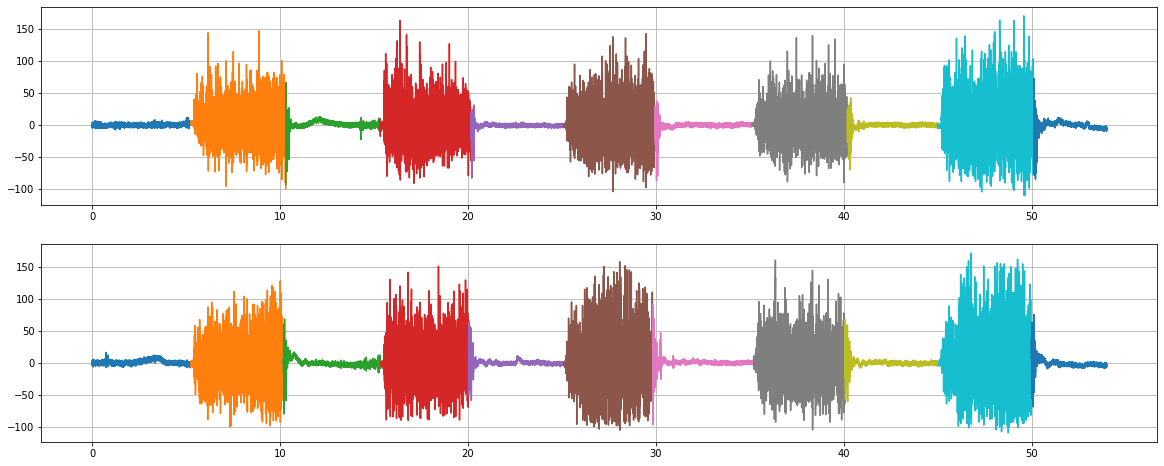

In [5]:
# Divisao dos canais

qtd_b1 = len(atvi_1)-1
qtd_b2 = len(atvi_2)-1
ch1_div = separa_sinal(temp_ch1, ch1, atvi_1)
ch2_div = separa_sinal(temp_ch2, ch2, atvi_2)

# --- PLOT --- #
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))
i = 0
while(i < qtd_b1):
    ax1.plot(ch1_div[0][i], ch1_div[1][i])
    ax1.grid()
    i += 1
i=0
while(i < qtd_b2):
    ax2.plot(ch2_div[0][i], ch2_div[1][i])
    ax2.grid()
    i += 1

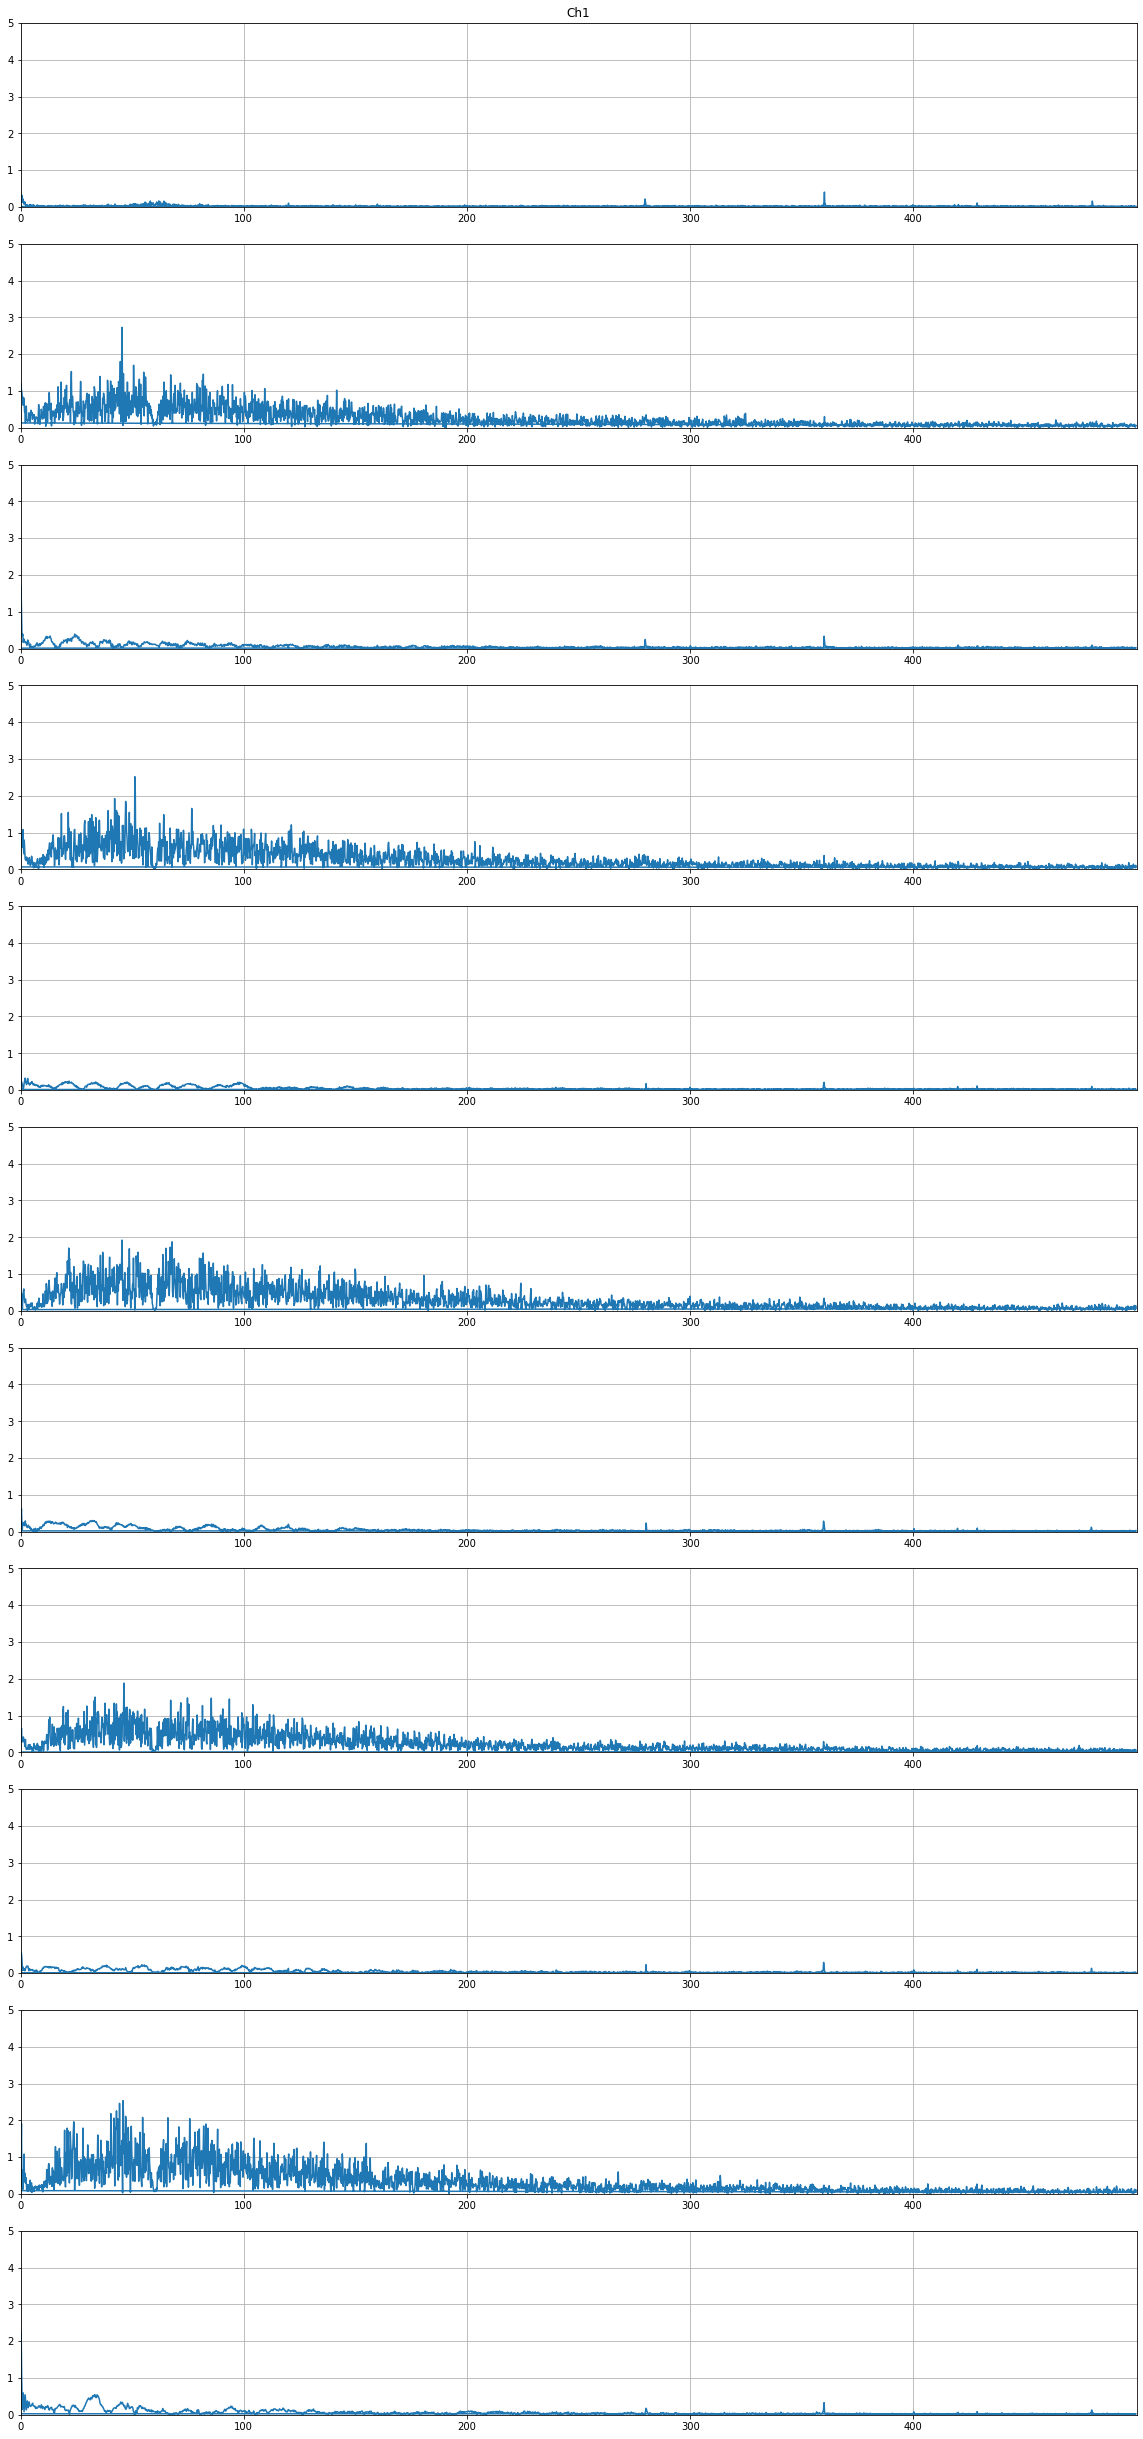

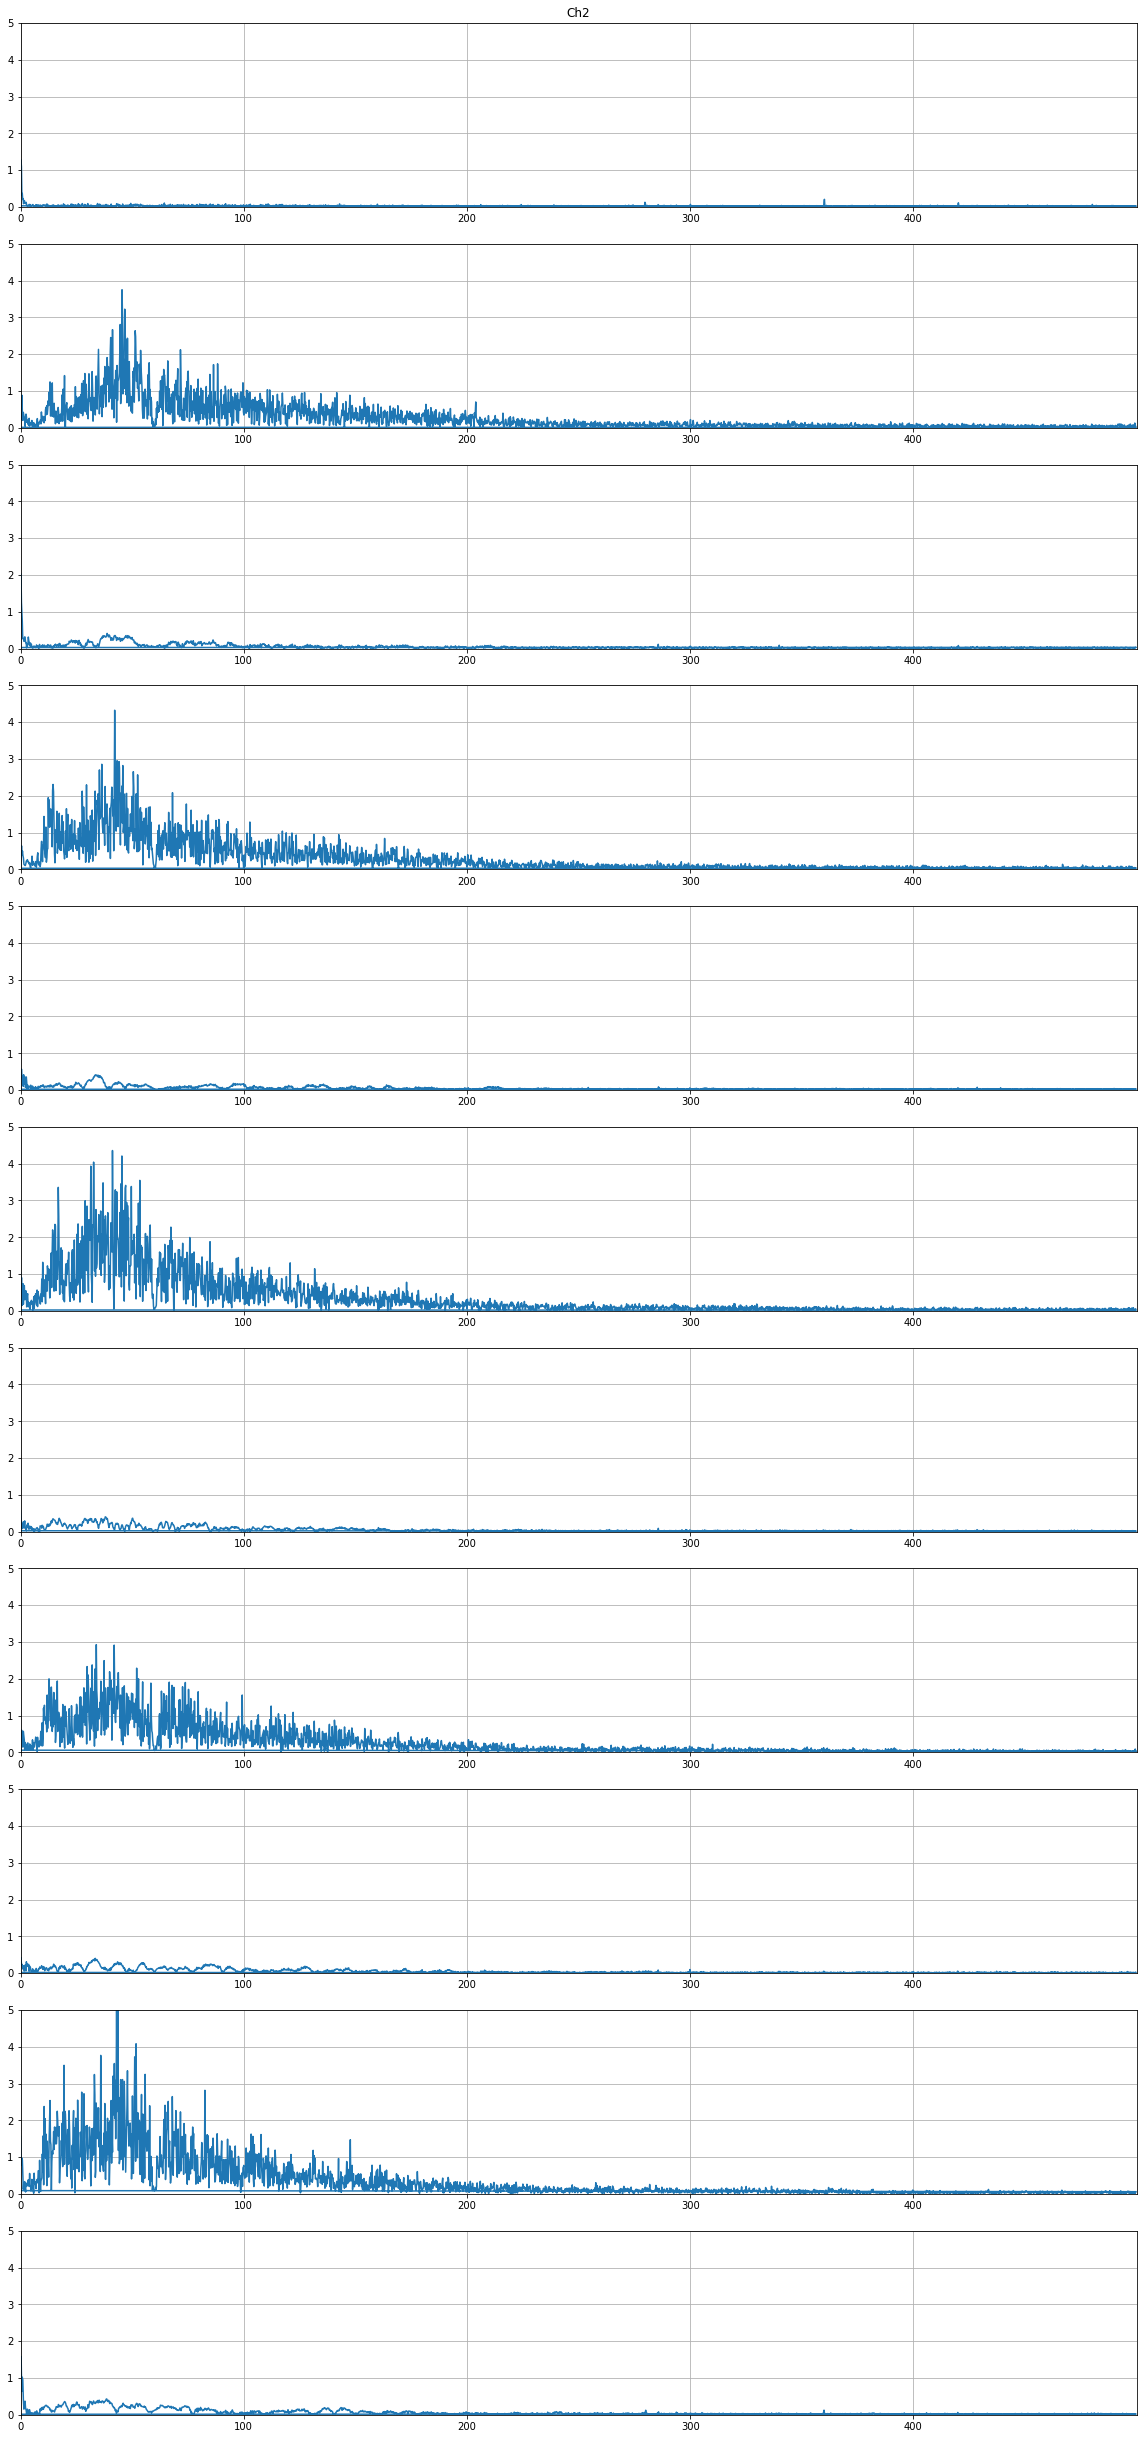

In [6]:
# FFT das partes

# --- FFT --- #
fftx_ch1, ffty_ch1 = fft_sinal(ch1, fs)
fftx_ch2, ffty_ch2 = fft_sinal(ch2, fs)

# --- PLOT --- #
fig, (ax1) = plt.subplots(len(ch1_div[1]), 1, figsize=(20, 4*len(ch1_div[1])))
i = 0
ax1[i].set_title("Ch1")
while(i < qtd_b1):
    Nx = len(ch1_div[1][i])-1
    fftx, ffty = fft_sinal(ch1_div[1][i], fs)
    ax1[i].plot(fftx, 1.0/Nx * np.abs(ffty))
    ax1[i].set_xlim(0, max(fftx_ch1))
    ax1[i].set_ylim(0, 5)
    ax1[i].grid()
    i += 1

fig, (ax2) = plt.subplots(len(ch1_div[1]), 1, figsize=(20, 4*len(ch2_div[1])))
i=0
ax2[i].set_title("Ch2")
while(i < qtd_b2):
    Nx = len(ch2_div[1][i])-1
    fftx, ffty = fft_sinal(ch2_div[1][i], fs)
    ax2[i].plot(fftx, 1.0/Nx * np.abs(ffty))
    ax2[i].set_xlim(0, max(fftx_ch1))
    ax2[i].set_ylim(0, 5)
    ax2[i].grid()
    i += 1

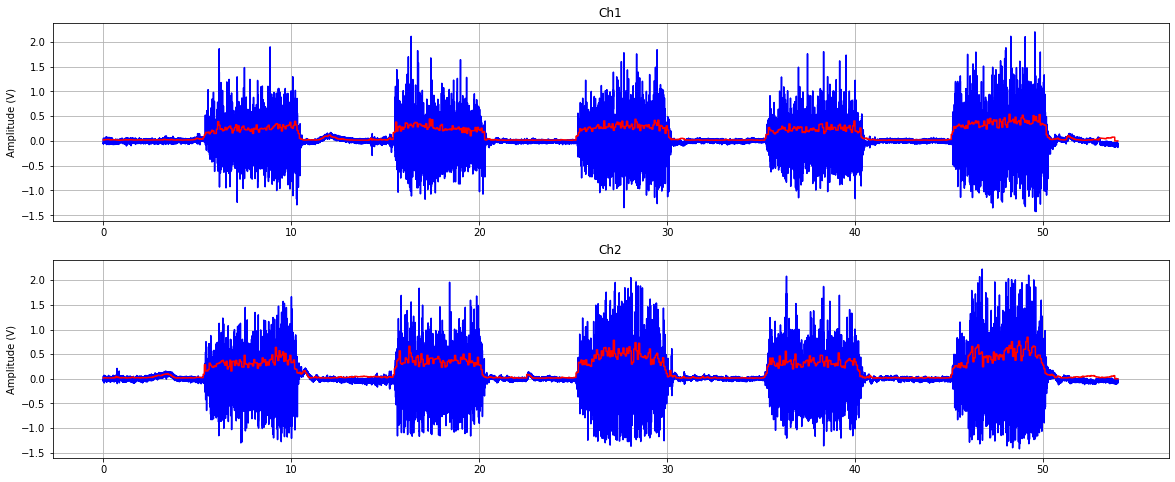

In [7]:
# --- CALCULO MEDIA ABS --- #
media_ch1 = emg_media(ch1, block_size=64)
media_ch2 = emg_media(ch2, block_size=64)

# --- PLOT --- #
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))
ax1.set_title("Ch1")
ax1.plot(temp_ch1, ch1*conv_adc, color='b')
ax1.plot(temp_ch1, media_ch1*conv_adc, color='r')
ax1.set_ylabel('Amplitude (V)')
ax1.grid()

ax2.set_title("Ch2")
ax2.plot(temp_ch2, ch2*conv_adc, color='b')
ax2.plot(temp_ch2, media_ch2*conv_adc, color='r')
ax2.set_ylabel('Amplitude (V)')
ax2.grid()

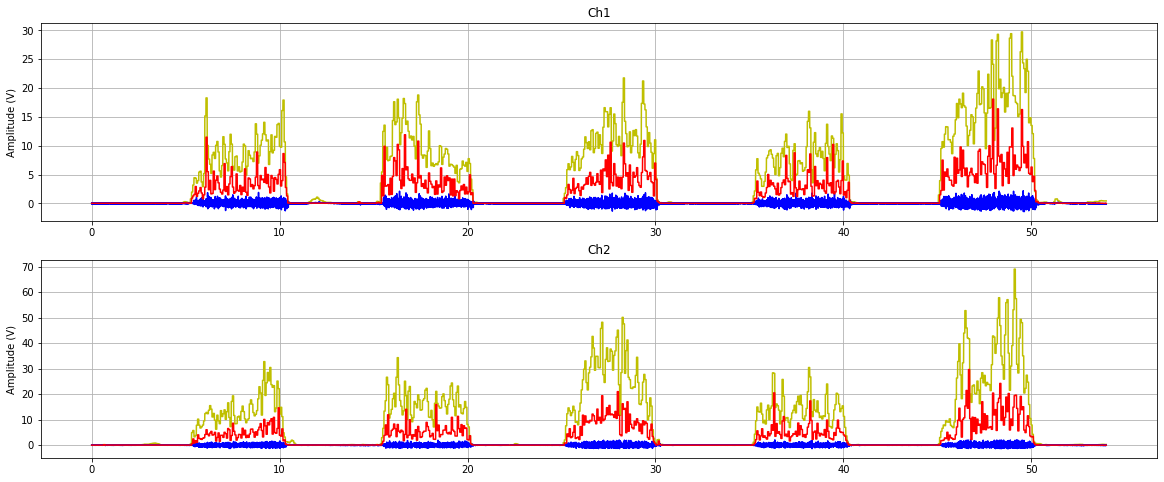

In [8]:
# --- CALCULO VARIANCIA --- #
variancia_ch1 = emg_variancia(ch1, block_size=64)
variancia_ch2 = emg_variancia(ch2, block_size=64)

# --- PLOT --- #
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))
ax1.set_title("Ch1")
ax1.plot(temp_ch1, energia_ch1*conv_adc, color='y')
ax1.plot(temp_ch1, ch1*conv_adc, color='b')
ax1.plot(temp_ch1, variancia_ch1*conv_adc, color='r')
ax1.set_ylabel('Amplitude (V)')
ax1.grid()

ax2.set_title("Ch2")
ax2.plot(temp_ch2, energia_ch2*conv_adc, color='y')
ax2.plot(temp_ch2, ch2*conv_adc, color='b')
ax2.plot(temp_ch2, variancia_ch2*conv_adc, color='r')
ax2.set_ylabel('Amplitude (V)')
ax2.grid()

In [9]:
# --- PASSAGEM POR ZERO --- #
zero_crossing = ((ch1[:-1] * ch1[1:]) < 0).sum()

print("Zero Crossing: %d" % zero_crossing)

Zero Crossing: 15386


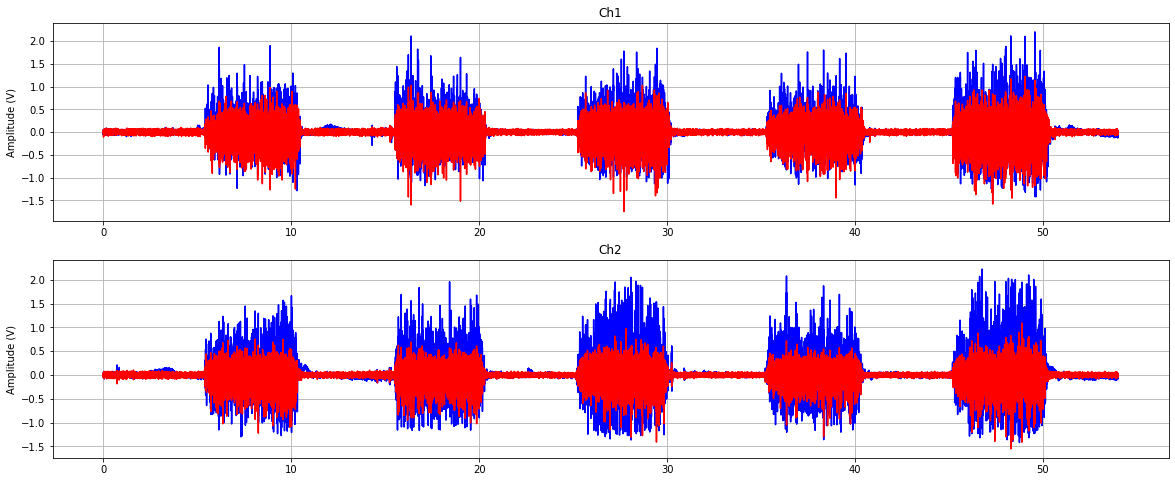

In [10]:
# --- CALCULO WAVEFORM LENGHT --- #
wl_ch1 = emg_waveform_length(ch1)
wl_ch2 = emg_waveform_length(ch2)

# --- PLOT --- #
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))
ax1.set_title("Ch1")
ax1.plot(temp_ch1, ch1*conv_adc, color='b')
ax1.plot(temp_ch1, wl_ch1*conv_adc, color='r')
ax1.set_ylabel('Amplitude (V)')
ax1.grid()

ax2.set_title("Ch2")
ax2.plot(temp_ch2, ch2*conv_adc, color='b')
ax2.plot(temp_ch2, wl_ch2*conv_adc, color='r')
ax2.set_ylabel('Amplitude (V)')
ax2.grid()



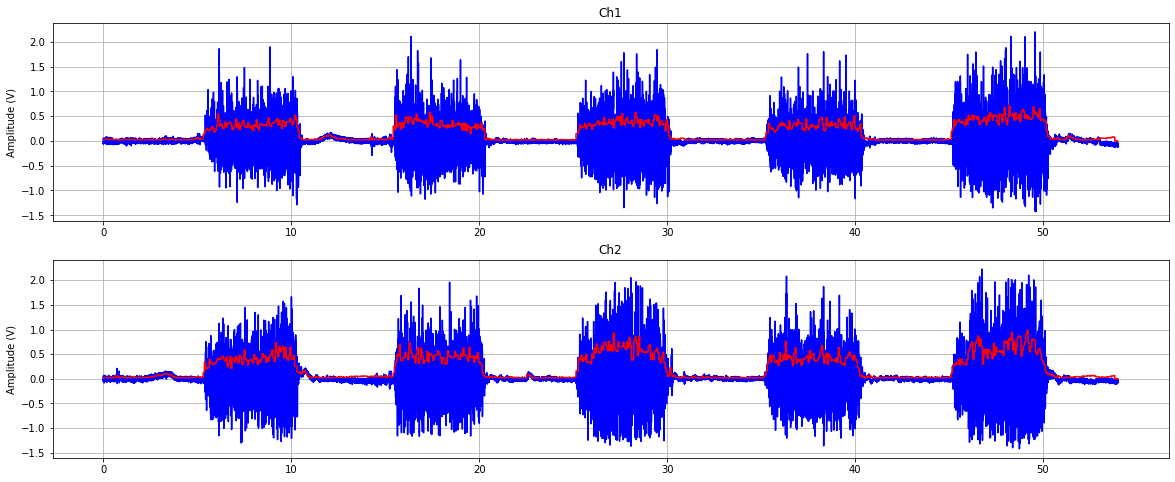

In [11]:
# --- CALCULO RMS --- #
rms_ch1 = emg_rms(ch1, block_size=64)
rms_ch2 = emg_rms(ch2, block_size=64)

# --- PLOT --- #
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))
ax1.set_title("Ch1")
ax1.plot(temp_ch1, ch1*conv_adc, color='b')
ax1.plot(temp_ch1, rms_ch1*conv_adc, color='r')
ax1.set_ylabel('Amplitude (V)')
ax1.grid()

ax2.set_title("Ch2")
ax2.plot(temp_ch2, ch2*conv_adc, color='b')
ax2.plot(temp_ch2, rms_ch2*conv_adc, color='r')
ax2.set_ylabel('Amplitude (V)')
ax2.grid()

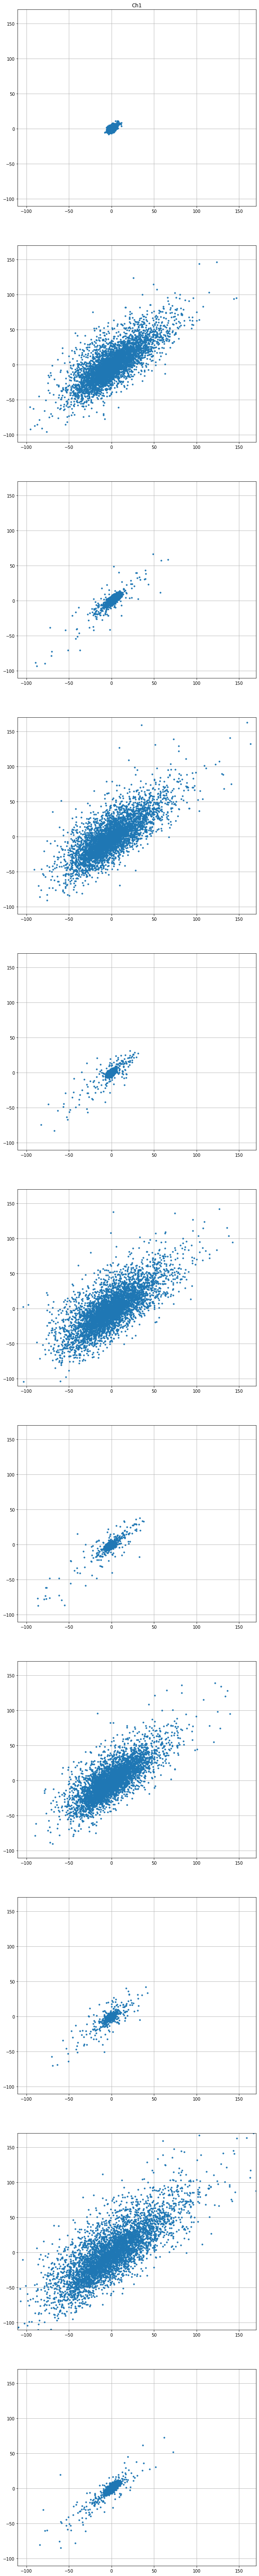

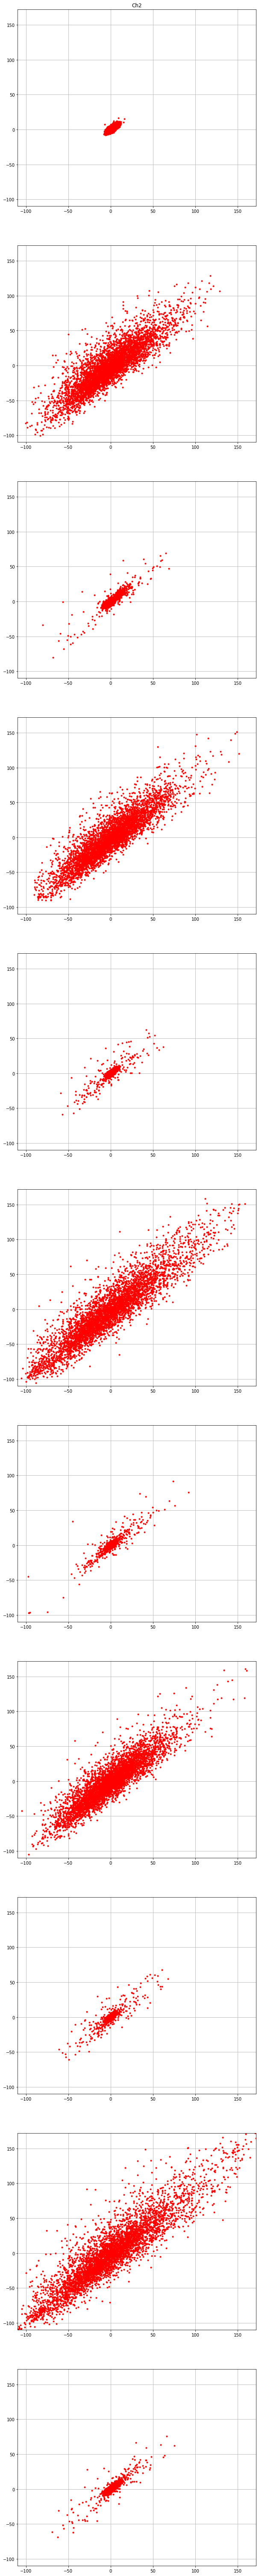

In [12]:
# --- CALCULO POINCARÉ --- #

# --- PLOT --- #
fig, (ax1) = plt.subplots(len(ch1_div[1]), 1, figsize=(10, 10*len(ch1_div[1])))
max_ch1 = max(ch1)
min_ch1 = min(ch1)
max_ch2 = max(ch2)
min_ch2 = min(ch2)

i = 0
ax1[i].set_title("Ch1")
while(i < qtd_b1):
    Nx = len(ch1_div[1][i])-1
    pltx = ch1_div[1][i][1:Nx]
    plty = ch1_div[1][i][0:(Nx-1)]
    ax1[i].plot(pltx, plty, '.')
    ax1[i].set_xlim(min_ch1, max_ch1)
    ax1[i].set_ylim(min_ch1, max_ch1)
    ax1[i].grid()
    i += 1

fig, (ax2) = plt.subplots(len(ch1_div[1]), 1, figsize=(10, 10*len(ch2_div[1])))
i=0
ax2[i].set_title("Ch2")
while(i < qtd_b2):
    Nx = len(ch2_div[1][i])-1
    pltx = ch2_div[1][i][1:Nx]
    plty = ch2_div[1][i][0:(Nx-1)]
    ax2[i].plot(pltx, plty, '.r')
    ax2[i].set_xlim(min_ch2, max_ch2)
    ax2[i].set_ylim(min_ch2, max_ch2)
    ax2[i].grid()
    i += 1

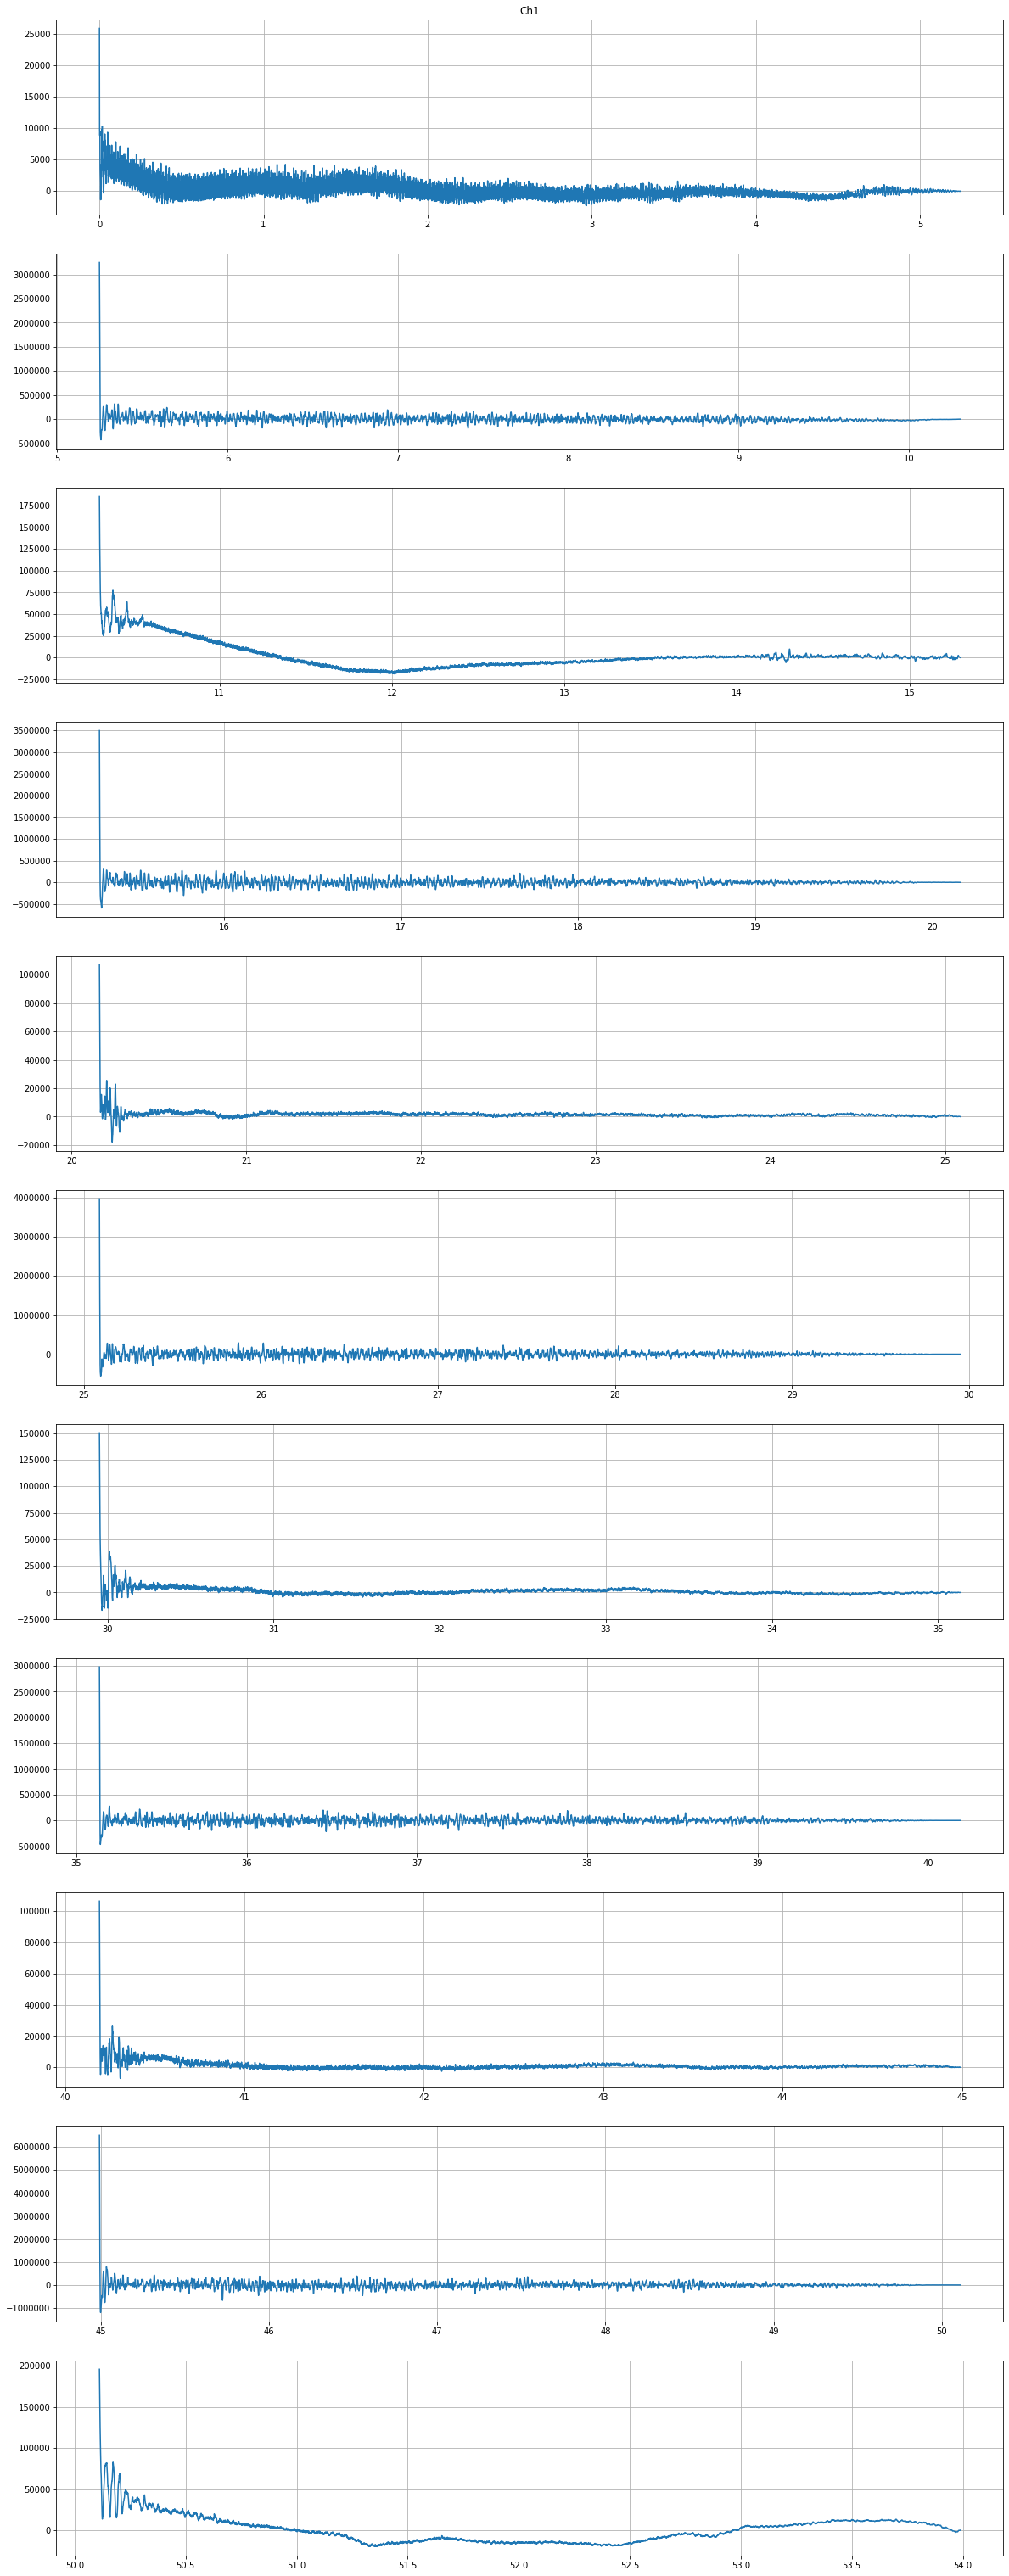

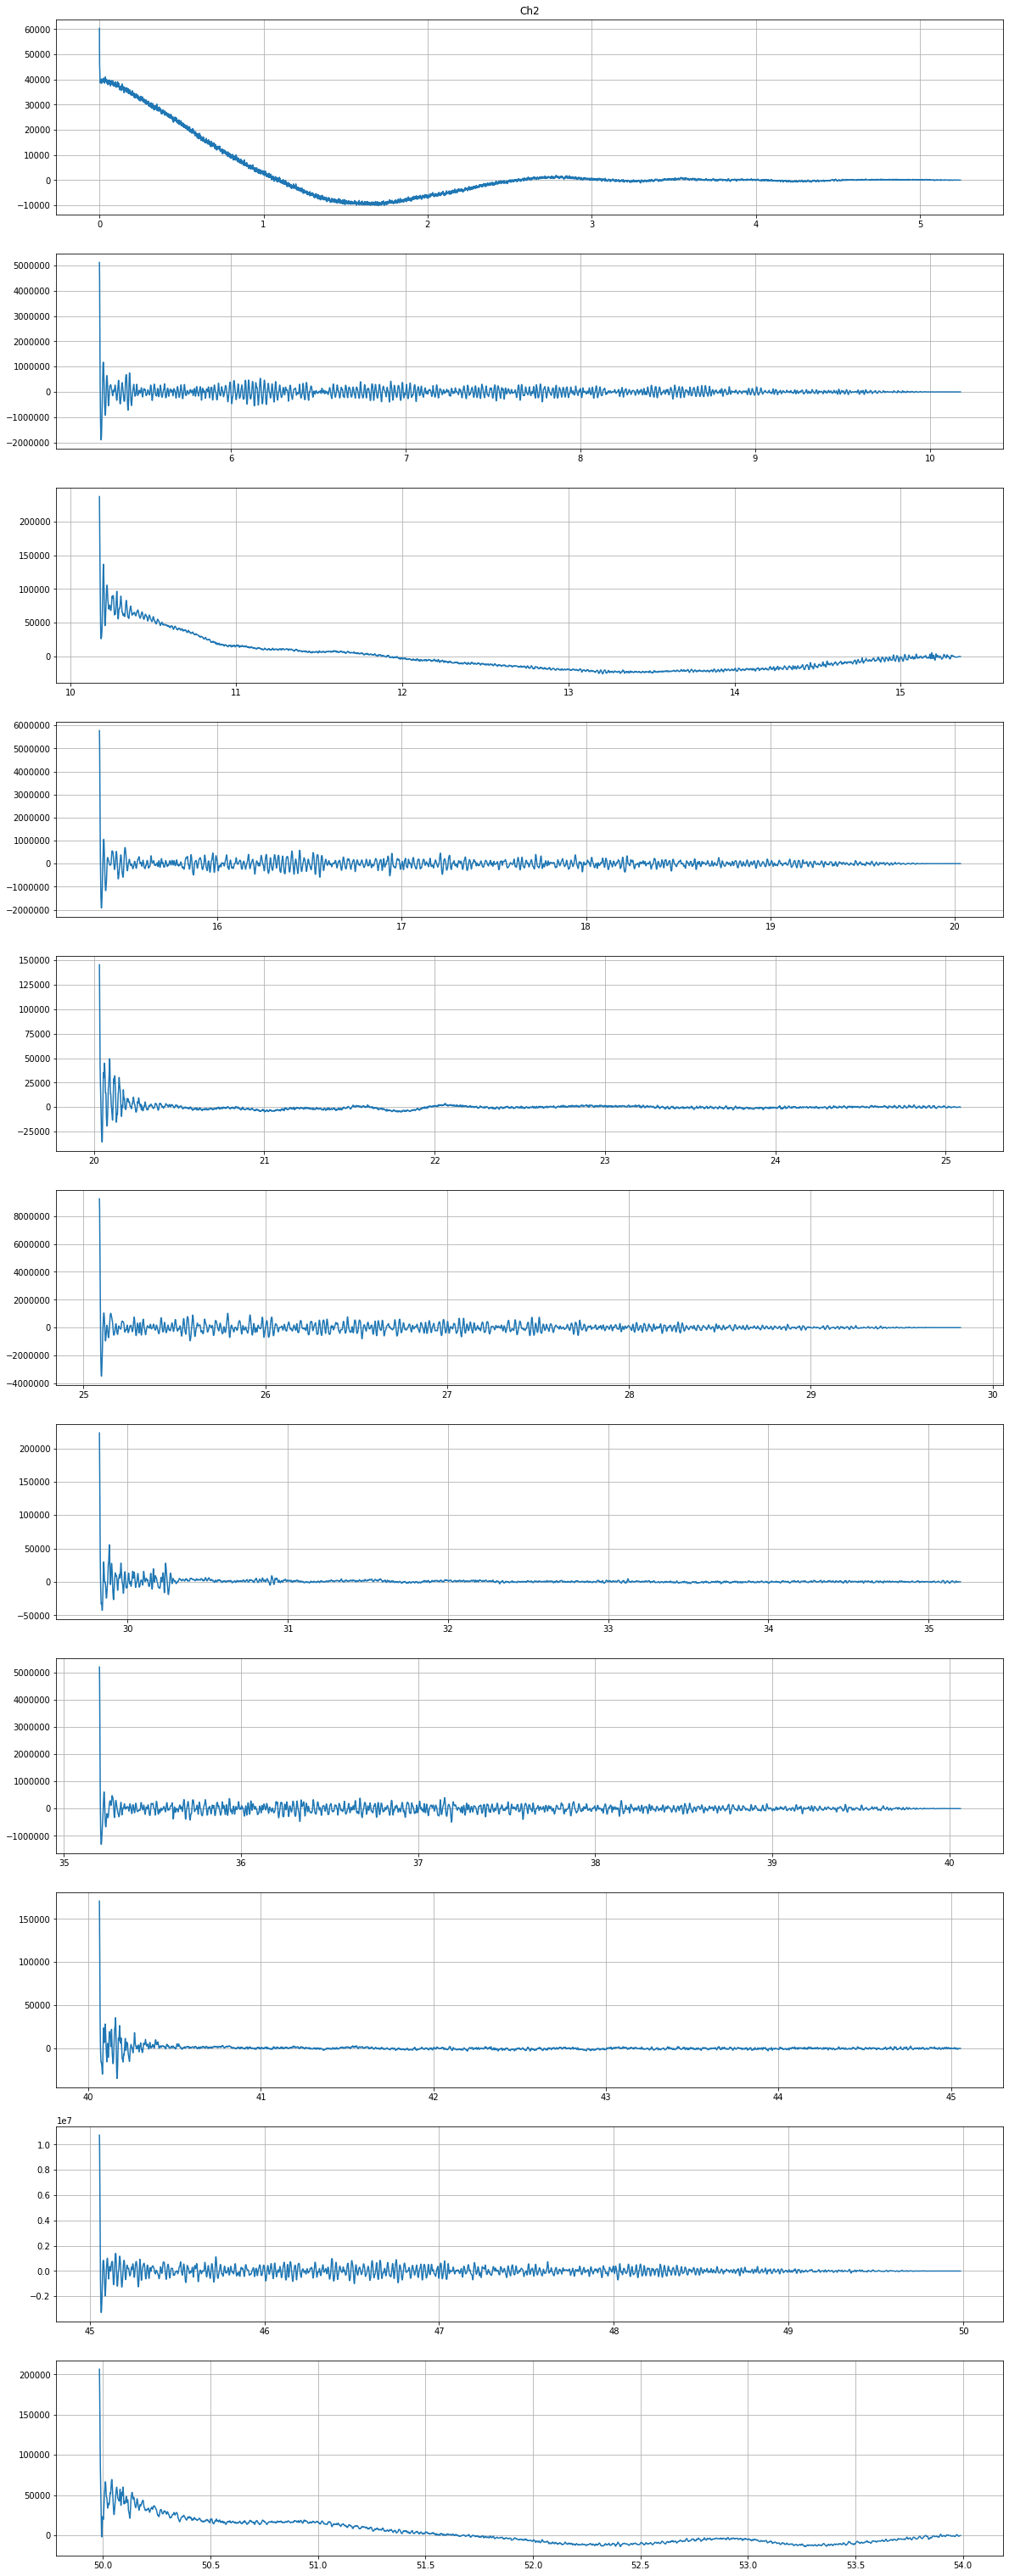

In [13]:
# --- CALCULO AUTOCORRELACAO --- #

# --- PLOT --- #
fig, (ax1) = plt.subplots(len(ch1_div[1]), 1, figsize=(20, 5*len(ch1_div[1])))

i = 0
ax1[i].set_title("Ch1")
while(i < qtd_b1):
    Nx = len(ch1_div[1][i])-1
    pltx = ch1_div[0][i]
    plty = np.correlate(ch1_div[1][i], ch1_div[1][i], "full")
    ax1[i].plot(pltx, plty[int((len(plty)-1)/2):len(plty)])
    ax1[i].grid()
    i += 1

fig, (ax2) = plt.subplots(len(ch1_div[1]), 1, figsize=(20, 5*len(ch2_div[1])))
i=0
ax2[i].set_title("Ch2")
while(i < qtd_b2):
    Nx = len(ch2_div[1][i])-1
    pltx = ch2_div[0][i]
    plty = np.correlate(ch2_div[1][i],ch2_div[1][i], "full")
    ax2[i].plot(pltx, plty[int((len(plty)-1)/2):len(plty)])
    ax2[i].grid()
    i += 1


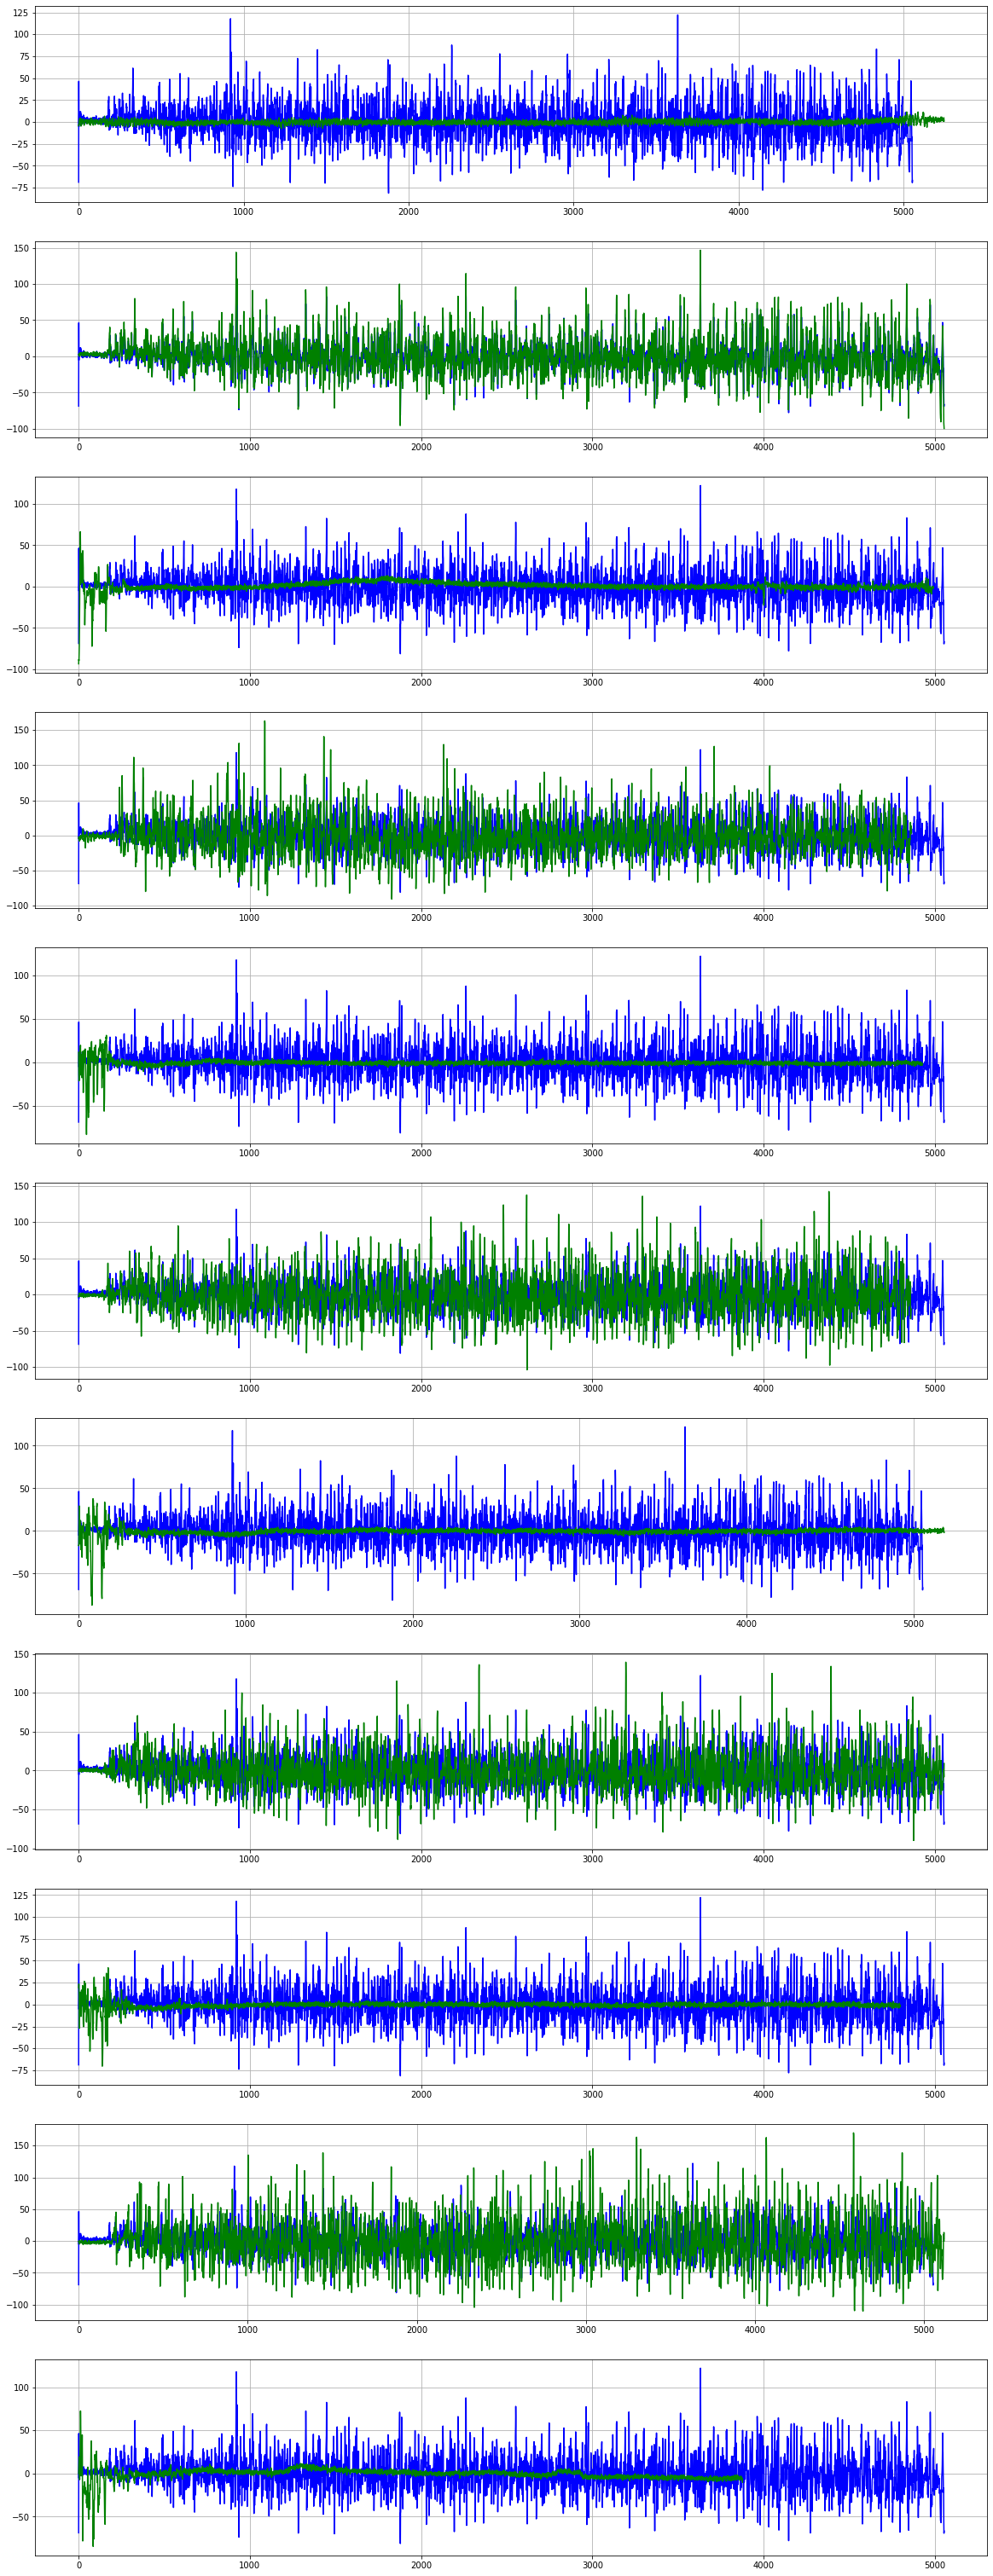

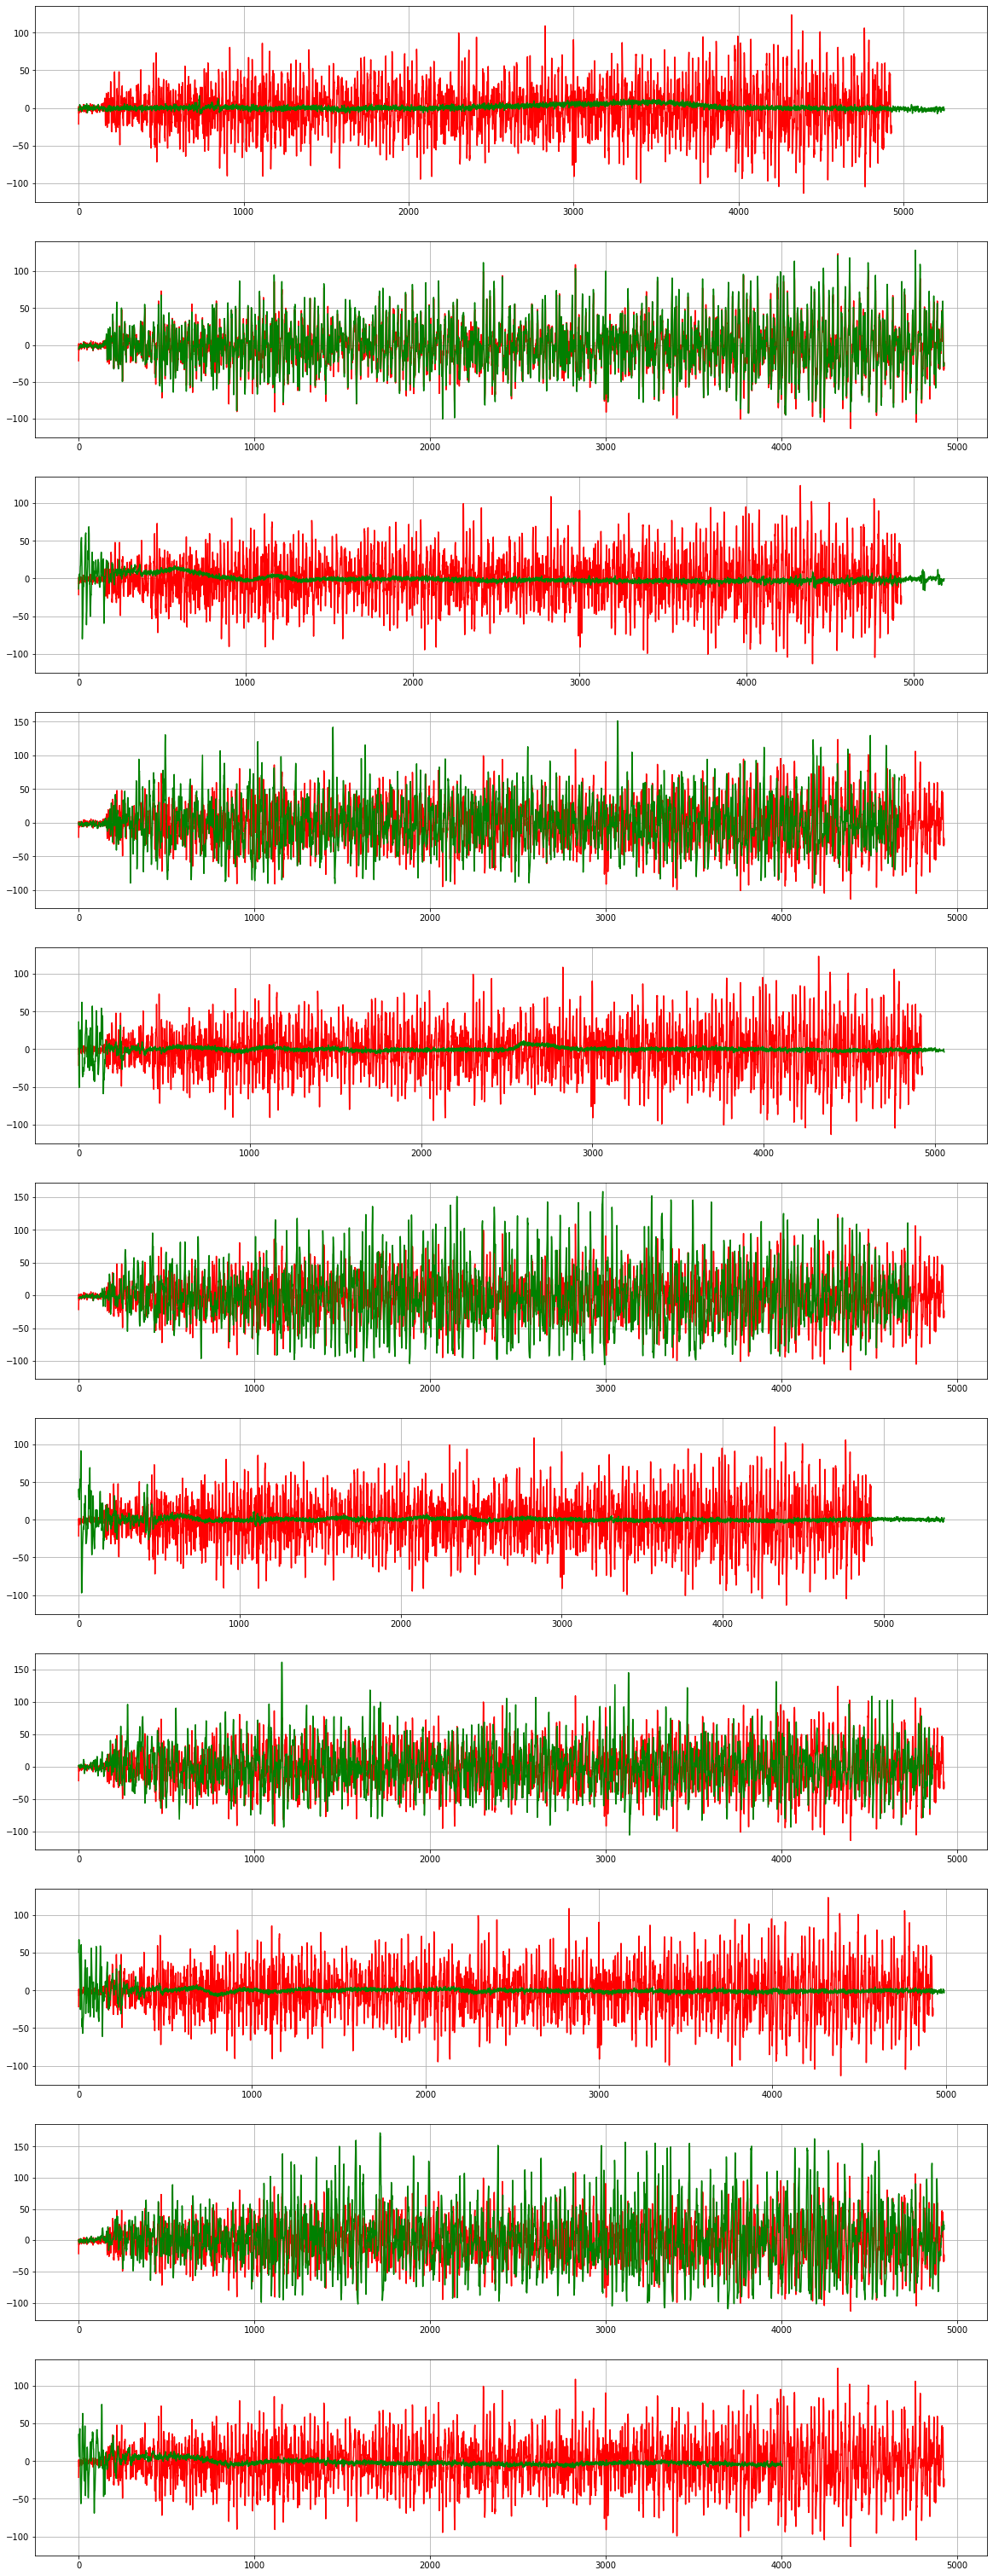

In [14]:
# --- CALCULO AUTOREGRESSÃO --- #

train_ch1 = ch1_div[1][1]
test_ch1 = ch1_div[1][1]
train_ch2 = ch2_div[1][1]
test_ch2 = ch2_div[1][1]

prediction_ch1 = ar_pred(train_ch1, test_ch1)
prediction_ch2 = ar_pred(train_ch2, test_ch2)
erro_ch1 = []
erro_ch2 = []

fig, (ax1) = plt.subplots(len(ch1_div[0]), 1, figsize=(20, 5*len(ch1_div[0])))
for i in range(len(ch1_div[0])):
    ax1[i].plot(prediction_ch1, color='blue')
    ax1[i].plot(ch1_div[1][i], color='green')
    ax1[i].grid()

fig, (ax2) = plt.subplots(len(ch2_div[0]), 1, figsize=(20, 5*len(ch2_div[0])))
for i in range(len(ch2_div[0])):
    ax2[i].plot(prediction_ch2, color='red')
    ax2[i].plot(ch2_div[1][i], color='green')
    ax2[i].grid()

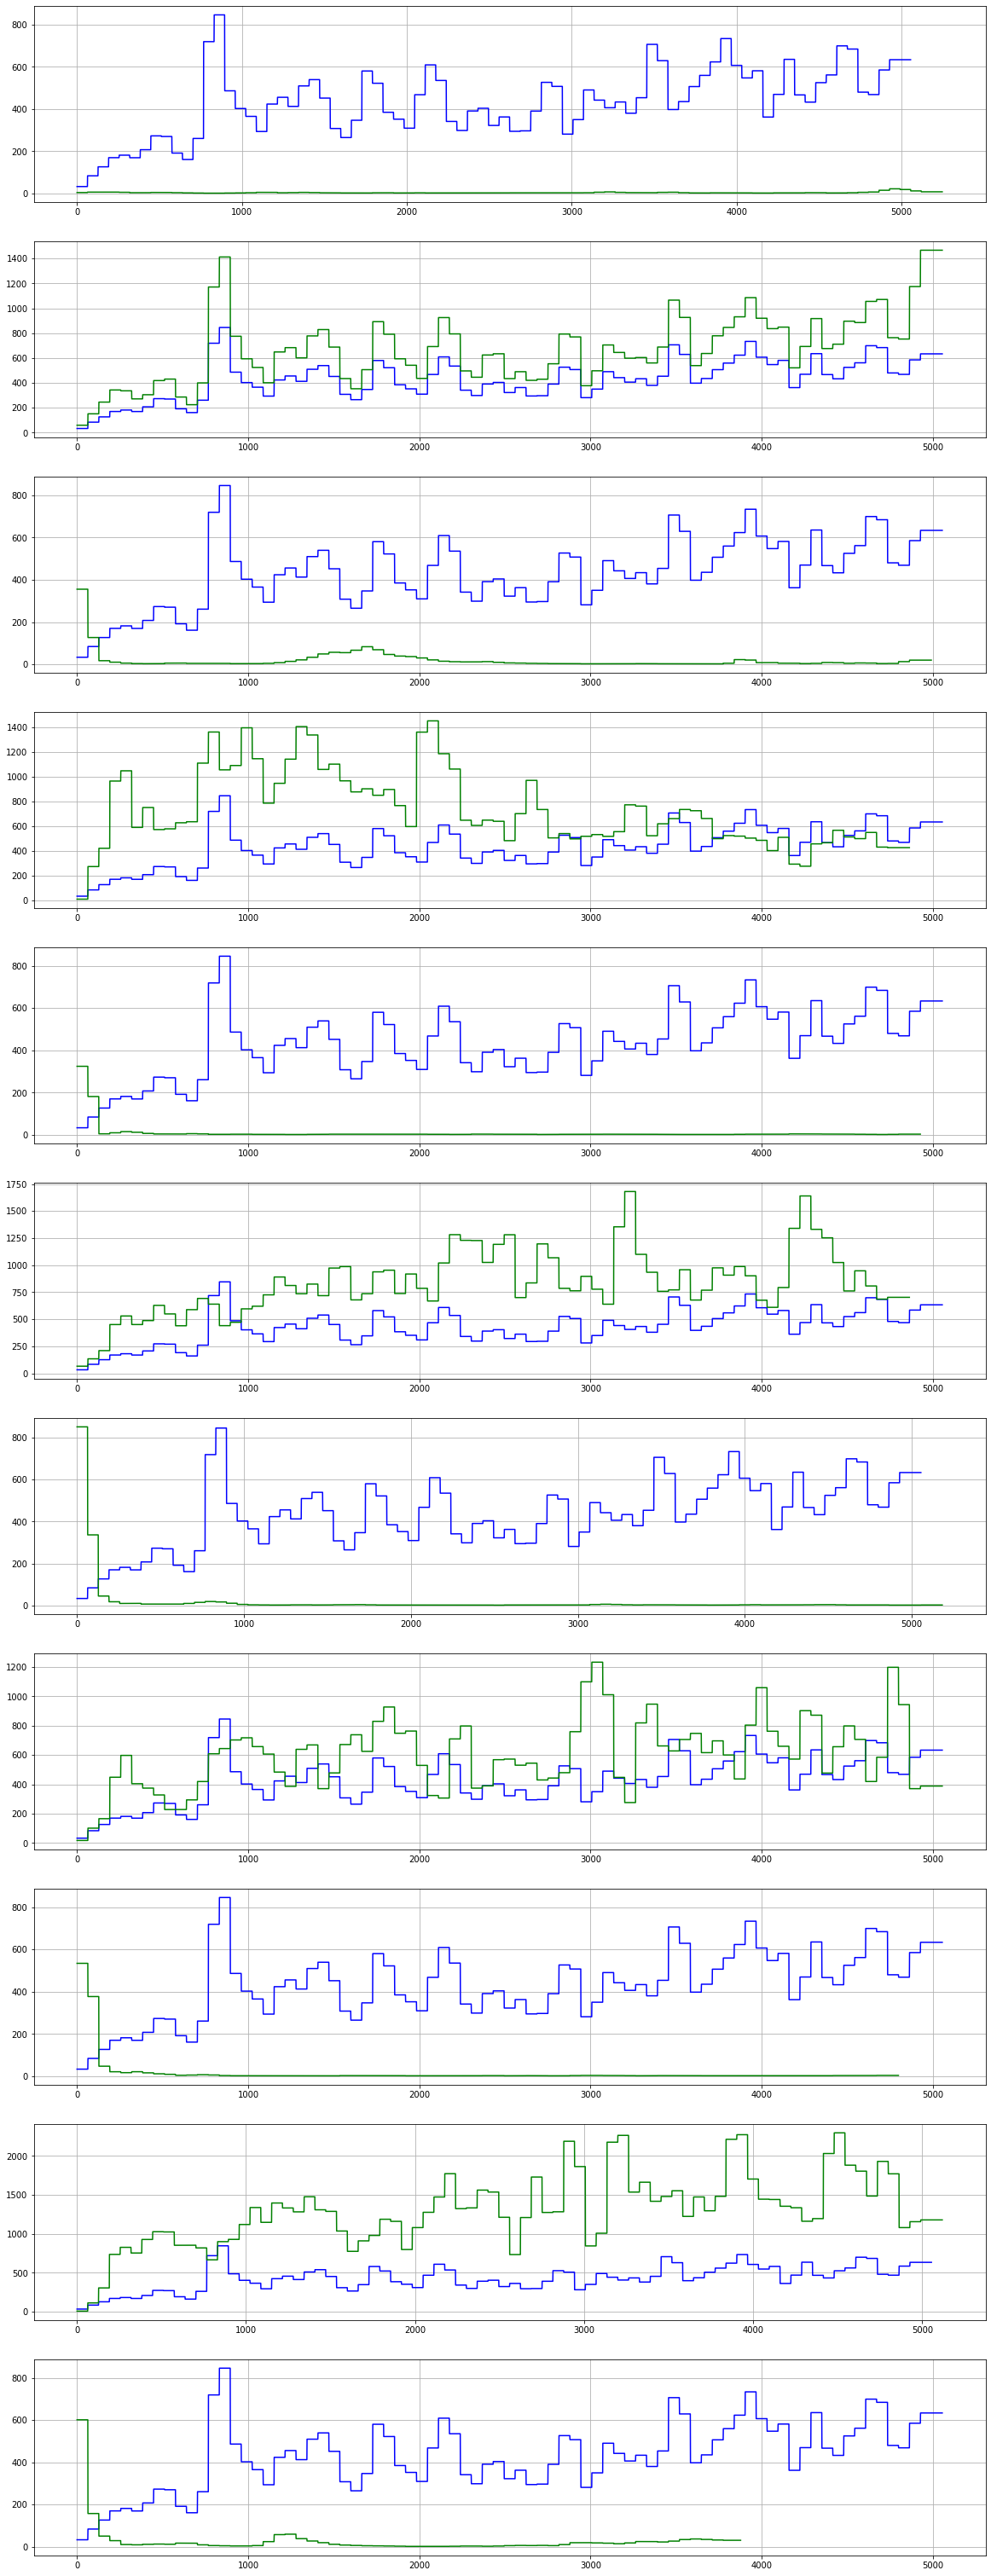

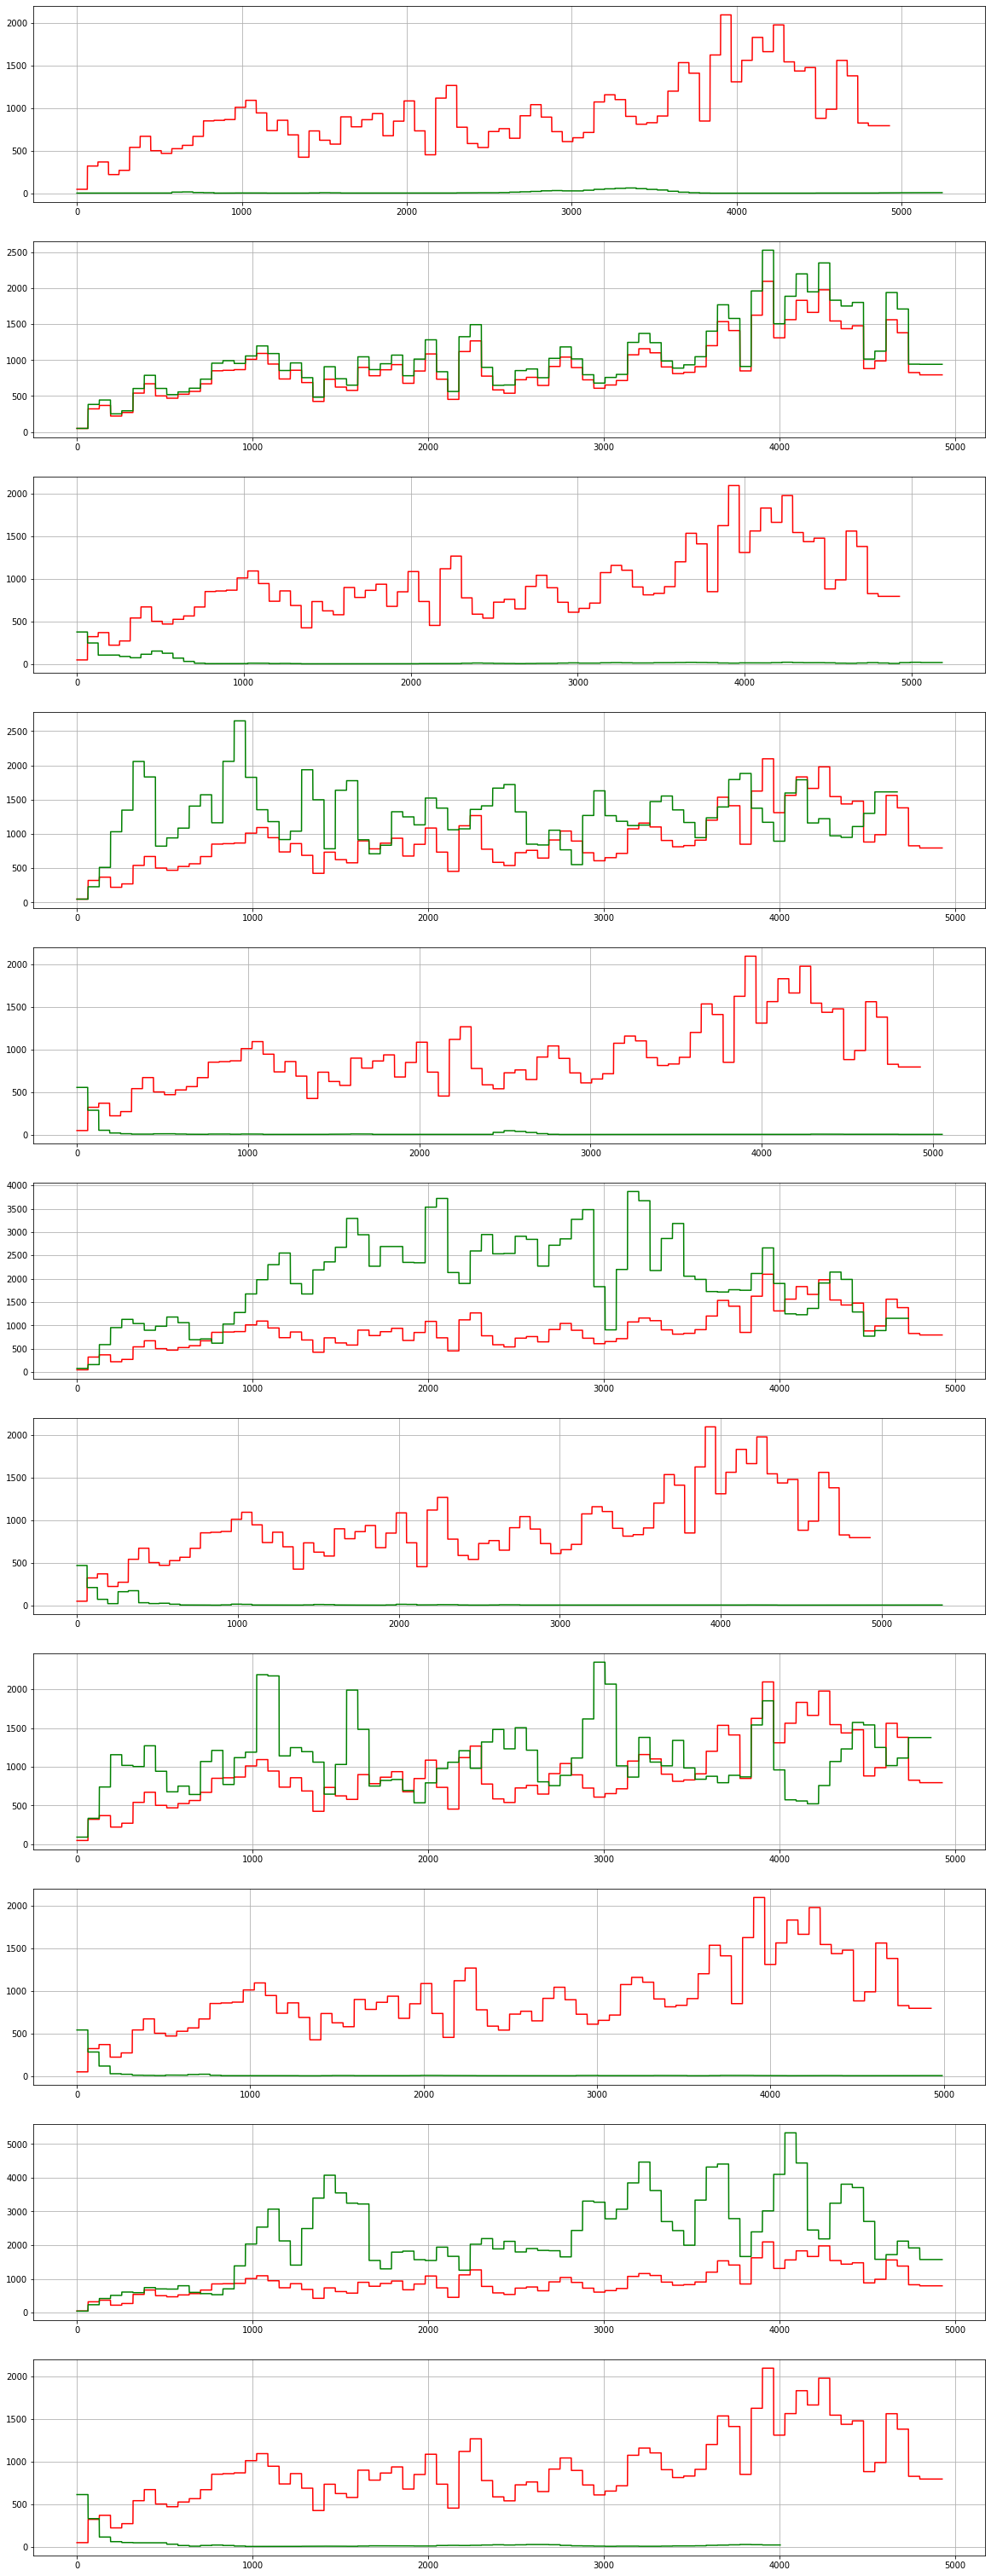

In [15]:
# --- CALCULO ENERGIA DA AUTOREGRESSÃO --- #
energiap_ch1 = energia_sinal(prediction_ch1, block_size=64)
energiap_ch2 = energia_sinal(prediction_ch2, block_size=64)

fig, (ax1) = plt.subplots(len(ch1_div[0]), 1, figsize=(20, 5*len(ch1_div[0])))
for i in range(len(ch1_div[0])):
    ax1[i].plot(energiap_ch1, color='blue')
    ax1[i].plot(energia_sinal(ch1_div[1][i], block_size=64), color='green')
    ax1[i].grid()

fig, (ax2) = plt.subplots(len(ch2_div[0]), 1, figsize=(20, 5*len(ch2_div[0])))
for i in range(len(ch2_div[0])):
    ax2[i].plot(energiap_ch2, color='red')
    ax2[i].plot(energia_sinal(ch2_div[1][i], block_size=64), color='green')
    ax2[i].grid()
    

3


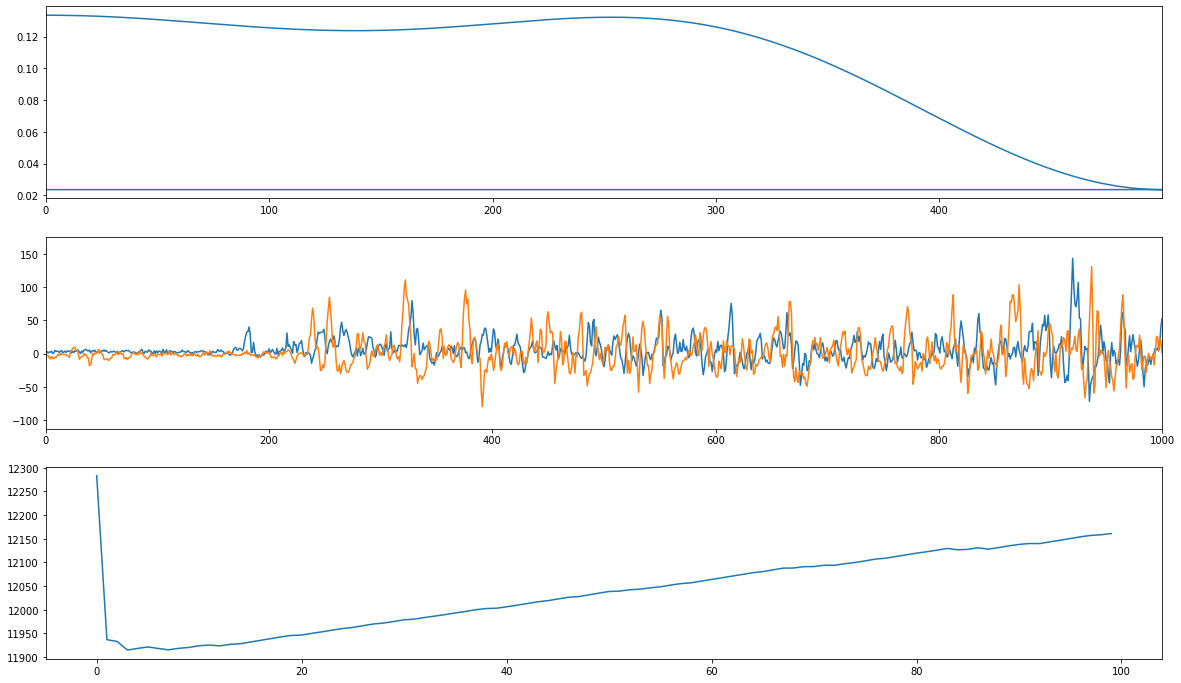

In [16]:
asinal = ch1_div[1][1]

ordem, vet_a, mdl, var, sinal_criado = auto_reg(asinal, 100)

va = np.ones(len(vet_a)+1)
va[1:len(va)] = vet_a
ffty = np.fft.fft(va, n=5248)
fftx = np.fft.fftfreq(5248, 1/fs)

print(ordem)
# --- PLOT --- #
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 12))
ax1.plot(fftx, var * 1.0/(len(ffty)-1) * np.abs(ffty)**2)
ax1.set_xlim(0, max(fftx))

ax2.plot(asinal)
ax2.plot(ch1_div[1][3])

ax2.set_xlim(0, 1000)

ax3.plot(mdl)